## Simulating Sampling Error

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

### The Urn Model

Our urn has 7 marbles, one for each pet.
Since we care only about whether a pet is a dog or cat, we can label each marble as 'dog' or 'cat',
rather than A through G. 
We create this urn as an array. 

In [2]:
urn = ['dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat']

Then we draw 3 marbles from our urn without replacement between draws using numpy's 'random.choice' as follows. 

In [3]:
np.random.choice(urn, size=3, replace=False)

array(['dog', 'dog', 'dog'], dtype='<U3')

We can keep sampling from our urn, e.g., below we take 10 samples from the urn: 

In [4]:
[np.random.choice(urn, size = 3, replace = False) for i in range(10)] 

[array(['cat', 'dog', 'dog'], dtype='<U3'),
 array(['cat', 'cat', 'dog'], dtype='<U3'),
 array(['cat', 'dog', 'dog'], dtype='<U3'),
 array(['dog', 'dog', 'cat'], dtype='<U3'),
 array(['cat', 'dog', 'dog'], dtype='<U3'),
 array(['dog', 'dog', 'cat'], dtype='<U3'),
 array(['cat', 'dog', 'cat'], dtype='<U3'),
 array(['dog', 'dog', 'dog'], dtype='<U3'),
 array(['dog', 'dog', 'cat'], dtype='<U3'),
 array(['cat', 'dog', 'dog'], dtype='<U3')]

Since we simply want to count the number of dogs in the sample, it's easier if our urn contains 1s (for dogs) and 0s (for cats) so that we can sum the results of the 3 draws to get the number of dogs in the sample. 
That is, 

In [5]:
urn = [1, 1, 1, 1, 0, 0, 0]
sum(np.random.choice(urn, size=3, replace=False))/3

0.0

For our simulation, we generate 100,000 samples, and compute the proportion of dogs in each.

In [6]:
simulations = [sum(np.random.choice(urn, size=3, replace=False))/3 for i in range(100000)] 

### Simulation Results

Let's study these 100,000 sample proportions. 
First, we compute the average value and the standard deviation of the 100,000 sample proportions,
and compare them to what the theory told us: the expected proportion is 4/7 or about 0.571, and 
the sampling error is about 0.233.

In [7]:
np.mean(simulations), np.std(simulations)

(0.5708066666666666, 0.23276066477535817)

These match quite closely.
We can also compare the fraction of the 100,000 values that are 0, 1/3, 2/3, and 1 and
make a histogram.

In [8]:
unique_els, counts_els = np.unique(np.array( simulations ), return_counts=True)

In [9]:
np.array((unique_els, counts_els/100000))

array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.02868   , 0.3429    , 0.51574   , 0.11268   ]])

Text(0.5, 0, 'Sample Proportion')

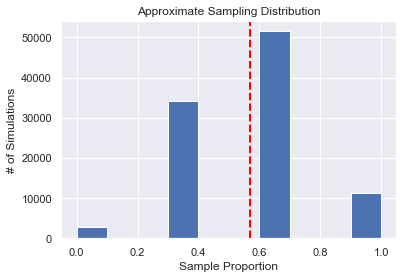

In [10]:
plt.hist(simulations)
plt.axvline(0.571, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Sample Proportion')

The simulations closely match the theory we developed.
This simulation study does not *prove* the expected value of the chance outcome is 4/7 or that the chance a  sample has 2 dogs is 18/35. 
However, the simulation does support our earlier calculations, and  
in more complex settings a simulation study can offer valuable insights. 

### Common probability distributions

This version of the urn model, where we count the number of marbles of a certain type (in our case 'dog' marbles), is so common that there is a random chance process named for it: the hypergeometric. 
Instead of using `random.choice`, we can use `random.hypergeometric`, which is optimzed for the 0-1 urn and allows us to ask for 100,000 simulations in the call. 
For completeness, we repeat our simulation study, calculate the average and standard error, and display the empirical proportions.  

In [11]:
simulations_fast = np.random.hypergeometric(ngood=4, nbad=3, nsample=3, size=100000)

Note: we don't think that cats are bad; it's just a naming convention to call the type you want to count 'good' and the other 'bad'. 

In [12]:
np.mean(simulations_fast / 3)

0.57188

In [13]:
np.std(simulations_fast / 3)

0.23341412658382285

In [14]:
unique_els, counts_els = np.unique(np.array( simulations_fast ), return_counts=True)

In [15]:
np.array((unique_els, counts_els/100000))

array([[0.     , 1.     , 2.     , 3.     ],
       [0.02851, 0.34225, 0.51433, 0.11491]])

Text(0.5, 0, 'Sample Proportion')

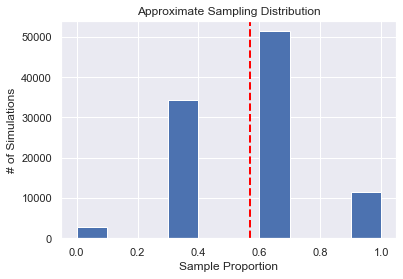

In [16]:
plt.hist(simulations_fast/3)
plt.axvline(0.57, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Sample Proportion')

Perhaps the two most common probability distributions are those that arise from counting the number of 1s drawn from a 0-1 urn: drawing without replacement is the hypergeometric distribution and drawing with replacement is the binomial. 
We do not delve further into the study of named probability distributions. 
However, if possible, it's a good idea to use the functionality provided in a third party package for simulating from a named distribution, rather than writing a simulation entirely from scratch.  Others have developed efficient and accurate code.

Our approach in this book is to develop intuition based on simulation studies to understand the results of a chance process. However, we do formalize the notion of a probability distribution, expected value, and standard deviation in Section XX.